In [148]:
! pip install kaggle

In [149]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [150]:
!mkdir -p ~/.kaggle

In [151]:
 ! cp /content/drive/MyDrive/Kaggle/kaggle.json ~/.kaggle/

In [152]:
! chmod 600 ~/.kaggle/kaggle.json

In [153]:
#! kaggle datasets download competitions/ieee-fraud-detection

In [154]:
!kaggle datasets list

ref                                                             title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rabieelkharoua/students-performance-dataset                     📚 Students Performance Dataset 📚                    66KB  2024-06-12 23:09:20           6148        130  1.0              
nelgiriyewithana/most-streamed-spotify-songs-2024               Most Streamed Spotify Songs 2024                   496KB  2024-06-15 18:50:51           4905        108  1.0              
shreyanshverma27/online-sales-dataset-popular-marketplace-data  Online Sales Dataset - Popular Marketplace Data      7KB  2024-05-25 23:55:26          12864        226  1.0              
anthonytherrien/restaurant-revenue-prediction-dataset           R

In [155]:
!pwd

/content/drive/MyDrive/Kaggle


In [156]:
#!kaggle competitions download -c ieee-fraud-detection -p /content/drive/MyDrive/Kaggle

In [157]:
!pwd

/content/drive/MyDrive/Kaggle


In [158]:
cd /content/drive/MyDrive/Kaggle

/content/drive/MyDrive/Kaggle


In [159]:
!pwd

/content/drive/MyDrive/Kaggle


In [160]:
#! unzip /content/drive/MyDrive/Kaggle/ieee-fraud-detection.zip

In [161]:
import pandas as pd
# for array computations and loading data
import numpy as np

# for building linear regression models and preparing data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# for building and training neural networks
import tensorflow as tf


# reduce display precision on numpy arrays
np.set_printoptions(precision=2)

# suppress warnings
tf.get_logger().setLevel('ERROR')
tf.autograph.set_verbosity(0)

In [162]:
#df_identity=pd.read_csv("train_identity.csv")
#df_transaction=pd.read_csv("train_transaction.csv")

In [163]:
#df_identity.info()

In [164]:
#df_transaction.info()

In [165]:
#print(df_transaction.isnull().sum())

In [166]:
#df_transaction_cleaned = df_transaction.dropna()

In [167]:
#df_transaction_cleaned.info()

In [168]:
#!kaggle datasets download -d rupakroy/online-payments-fraud-detection-dataset -p /content/drive/MyDrive/Kaggle

In [169]:
#! unzip /content/drive/MyDrive/Kaggle/online-payments-fraud-detection-dataset.zip

In [170]:
df=pd.read_csv("PS_20174392719_1491204439457_log.csv")

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [172]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# **EDA**

In [173]:
one_hot = pd.get_dummies(df['type'])
# Drop column B as it is now encoded
df = df.drop('type',axis = 1)
# Join the encoded df
df = df.join(one_hot)
df

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,False,False,False,True,False
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,False,False,False,True,False
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,False,False,False,False,True
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,False,True,False,False,False
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,False,True,False,False,False
6362616,743,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,False,False,False,False,True
6362617,743,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,False,True,False,False,False
6362618,743,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,False,False,False,False,True


In [174]:
df=df.drop(columns=[ "nameOrig"])

In [175]:
df["nameDest_type"]=df["nameDest"].str[:1]
df["nameDest_type"]

0          M
1          M
2          C
3          C
4          M
          ..
6362615    C
6362616    C
6362617    C
6362618    C
6362619    C
Name: nameDest_type, Length: 6362620, dtype: object

In [176]:
#one hot encoding of C, M done
df=df.drop(columns=[ "nameDest"])

In [177]:
df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,nameDest_type
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,False,False,False,True,False,M
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,False,False,False,True,False,M
2,1,181.00,181.00,0.00,0.00,0.00,1,0,False,False,False,False,True,C
3,1,181.00,181.00,0.00,21182.00,0.00,1,0,False,True,False,False,False,C
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,False,False,False,True,False,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,0,False,True,False,False,False,C
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0,False,False,False,False,True,C
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,False,True,False,False,False,C
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,0,False,False,False,False,True,C


In [178]:
def norm_column(df,col):
  df_col=df[col]
  max_val=df_col.max(axis=0)
  min_val=df_col.min(axis=0)
  df[col]=(df_col-min_val)/(max_val-min_val)

In [179]:
norm_cols=["step","amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]
for col in norm_cols:
  norm_column(df,col)

In [180]:
one_hot = pd.get_dummies(df['nameDest_type'])
# Drop column B as it is now encoded
df = df.drop('nameDest_type',axis = 1)
# Join the encoded df
df = df.join(one_hot)
df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,C,M
0,0.0,0.000106,0.002855,0.003233,0.000000,0.000000,0,0,False,False,False,True,False,False,True
1,0.0,0.000020,0.000357,0.000391,0.000000,0.000000,0,0,False,False,False,True,False,False,True
2,0.0,0.000002,0.000003,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,True,False
3,0.0,0.000002,0.000003,0.000000,0.000059,0.000000,1,0,False,True,False,False,False,True,False
4,0.0,0.000126,0.000697,0.000603,0.000000,0.000000,0,0,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,1.0,0.003674,0.005701,0.000000,0.000000,0.000954,1,0,False,True,False,False,False,True,False
6362616,1.0,0.068272,0.105923,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,True,False
6362617,1.0,0.068272,0.105923,0.000000,0.000192,0.017912,1,0,False,True,False,False,False,True,False
6362618,1.0,0.009195,0.014265,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,True,False


In [181]:
df=df.drop(columns=[ "M"])

In [182]:
df_copy=df

In [183]:
df[df['isFraud'] == 1].count()

step              8213
amount            8213
oldbalanceOrg     8213
newbalanceOrig    8213
oldbalanceDest    8213
newbalanceDest    8213
isFraud           8213
isFlaggedFraud    8213
CASH_IN           8213
CASH_OUT          8213
DEBIT             8213
PAYMENT           8213
TRANSFER          8213
C                 8213
dtype: int64

In [184]:
df[df['isFraud'] == 0].count()

step              6354407
amount            6354407
oldbalanceOrg     6354407
newbalanceOrig    6354407
oldbalanceDest    6354407
newbalanceDest    6354407
isFraud           6354407
isFlaggedFraud    6354407
CASH_IN           6354407
CASH_OUT          6354407
DEBIT             6354407
PAYMENT           6354407
TRANSFER          6354407
C                 6354407
dtype: int64

In [185]:
#! pip install imbalanced-learn

I'll go for under-sampling

In [186]:
# from imblearn.under_sampling import RandomUnderSampler
# rus = RandomUnderSampler(random_state=0)
# df_copy_resampled = rus.fit_resample(df_copy['isFraud'])

In [187]:
df_isfraud=df_copy[df_copy['isFraud']==1]

In [188]:
df_isnotFraud=df_copy[df_copy['isFraud']==0]

In [189]:
df_isnotFraud=df_isnotFraud.sample(n=df_isfraud.shape[0])
df_isnotFraud

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,C
1320613,0.181941,0.000370,0.000000,0.000000,0.000424,0.000520,0,0,False,True,False,False,False,True
5380003,0.505391,0.000661,0.000000,0.000000,0.011662,0.011828,0,0,False,False,False,False,True,True
4634547,0.443396,0.000527,0.001122,0.000367,0.000000,0.000000,0,0,False,False,False,True,False,False
3394262,0.342318,0.002567,0.001949,0.000000,0.000000,0.000666,0,0,False,True,False,False,False,True
5544090,0.513477,0.003584,0.000009,0.006692,0.000905,0.000000,0,0,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3795580,0.377358,0.000033,0.000141,0.000107,0.035895,0.035887,0,0,False,True,False,False,False,True
4045454,0.402965,0.000014,0.001806,0.002143,0.000060,0.000064,0,0,False,True,False,False,False,True
2686640,0.281671,0.000229,0.001039,0.000821,0.000000,0.000000,0,0,False,False,False,True,False,False
3089469,0.315364,0.000024,0.000742,0.000846,0.000000,0.000000,0,0,False,False,False,True,False,False


In [190]:
df_copy=pd.concat(objs=[df_isfraud,df_isnotFraud])
df_copy

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,C
2,0.000000,0.000002,0.000003,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,True
3,0.000000,0.000002,0.000003,0.000000,0.000059,0.000000,1,0,False,True,False,False,False,True
251,0.000000,0.000030,0.000047,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,True
252,0.000000,0.000030,0.000047,0.000000,0.000074,0.000000,1,0,False,True,False,False,False,True
680,0.000000,0.000218,0.000338,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3795580,0.377358,0.000033,0.000141,0.000107,0.035895,0.035887,0,0,False,True,False,False,False,True
4045454,0.402965,0.000014,0.001806,0.002143,0.000060,0.000064,0,0,False,True,False,False,False,True
2686640,0.281671,0.000229,0.001039,0.000821,0.000000,0.000000,0,0,False,False,False,True,False,False
3089469,0.315364,0.000024,0.000742,0.000846,0.000000,0.000000,0,0,False,False,False,True,False,False


#RandomForest

In [191]:
df_rf=df_copy

In [192]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [193]:
# Split the data into features (X) and target (y)
X = df_rf.drop('isFraud', axis=1)
y = df_rf['isFraud']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [194]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [195]:
y_pred = rf.predict(X_test)

In [196]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9920876445526476


#XGBoost

In [197]:
df_xg=df_copy

In [198]:
!pip install --user xgboost

In [199]:
import seaborn as sns

In [200]:
import xgboost as xgb

# Create regression matrices
dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [201]:
params = {"objective": "reg:squarederror", "tree_method": "gpu_hist"}

n = 100
model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [14:10:20] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


In [202]:
from sklearn.metrics import mean_squared_error

preds = model.predict(dtest_reg)

In [203]:
rmse = mean_squared_error(y_test, preds, squared=False)

print(f"RMSE of the base model: {rmse:.3f}")

RMSE of the base model: 0.069


In [204]:
evals = [(dtrain_reg, "train"), (dtest_reg, "validation")]

model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
   evals=evals,
)

[0]	train-rmse:0.36071	validation-rmse:0.35936
[1]	train-rmse:0.26620	validation-rmse:0.26388
[2]	train-rmse:0.19701	validation-rmse:0.19565
[3]	train-rmse:0.15113	validation-rmse:0.15060
[4]	train-rmse:0.12213	validation-rmse:0.12212
[5]	train-rmse:0.10171	validation-rmse:0.10433
[6]	train-rmse:0.08876	validation-rmse:0.09362
[7]	train-rmse:0.08075	validation-rmse:0.08664
[8]	train-rmse:0.07569	validation-rmse:0.08308
[9]	train-rmse:0.07284	validation-rmse:0.08067
[10]	train-rmse:0.07087	validation-rmse:0.07953
[11]	train-rmse:0.06963	validation-rmse:0.07879
[12]	train-rmse:0.06818	validation-rmse:0.07802
[13]	train-rmse:0.06691	validation-rmse:0.07768
[14]	train-rmse:0.06574	validation-rmse:0.07769
[15]	train-rmse:0.06478	validation-rmse:0.07756
[16]	train-rmse:0.06422	validation-rmse:0.07758
[17]	train-rmse:0.06333	validation-rmse:0.07754
[18]	train-rmse:0.06310	validation-rmse:0.07750
[19]	train-rmse:0.06234	validation-rmse:0.07751
[20]	train-rmse:0.06197	validation-rmse:0.07744
[2

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [14:10:20] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[40]	train-rmse:0.04604	validation-rmse:0.07160
[41]	train-rmse:0.04569	validation-rmse:0.07149
[42]	train-rmse:0.04534	validation-rmse:0.07154
[43]	train-rmse:0.04456	validation-rmse:0.07152
[44]	train-rmse:0.04440	validation-rmse:0.07153
[45]	train-rmse:0.04377	validation-rmse:0.07151
[46]	train-rmse:0.04329	validation-rmse:0.07148
[47]	train-rmse:0.04269	validation-rmse:0.07148
[48]	train-rmse:0.04178	validation-rmse:0.07117
[49]	train-rmse:0.04171	validation-rmse:0.07119
[50]	train-rmse:0.04147	validation-rmse:0.07126
[51]	train-rmse:0.04103	validation-rmse:0.07113
[52]	train-rmse:0.04057	validation-rmse:0.07093
[53]	train-rmse:0.04029	validation-rmse:0.07089
[54]	train-rmse:0.03964	validation-rmse:0.07090
[55]	train-rmse:0.03898	validation-rmse:0.07048
[56]	train-rmse:0.03829	validation-rmse:0.07022
[57]	train-rmse:0.03813	validation-rmse:0.07021
[58]	train-rmse:0.03776	validation-rmse:0.07039
[59]	train-rmse:0.03763	validation-rmse:0.07043
[60]	train-rmse:0.03736	validation-rmse:

#Neural Networks

In [205]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [206]:
model = Sequential()
model.add(Dense(12, input_shape=(13,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [207]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [208]:
X_train.shape, y_train.shape

((13140, 13), (13140,))

In [209]:
# X_train_shaped=[X_train]
# X_train_shaped

[             step    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
 5666875  0.532345  0.014716       0.000010        0.000000        0.000057   
 259844   0.017520  0.000708       0.001099        0.000000        0.000000   
 4300485  0.412399  0.000040       0.000151        0.000106        0.000000   
 5987909  0.551213  0.009430       0.014630        0.000000        0.005141   
 1030534  0.094340  0.020245       0.031410        0.000000        0.000000   
 ...           ...       ...            ...             ...             ...   
 1030580  0.098383  0.000647       0.001004        0.000000        0.000000   
 6019722  0.614555  0.011001       0.017068        0.000000        0.000000   
 6082012  0.700809  0.000527       0.000818        0.000000        0.001538   
 2367888  0.256065  0.000077       0.000000        0.000000        0.000000   
 6276609  0.858491  0.055188       0.085623        0.000000        0.000410   
 
          newbalanceDest  isFlaggedFraud  CASH_IN 

In [210]:
X_train_shaped=tf.convert_to_tensor(X_train, dtype=tf.float32)

In [211]:
y_train_shaped=tf.convert_to_tensor(y_train, dtype=tf.float32)

In [145]:
model.fit(X_train_shaped, y_train_shaped, epochs=80, batch_size=10)

Epoch 1/80
1314/1314 [==============================] - 4s 3ms/step - loss: 0.3961 - accuracy: 0.7976
Epoch 2/80
1314/1314 [==============================] - 4s 3ms/step - loss: 0.3306 - accuracy: 0.8374
Epoch 3/80
1314/1314 [==============================] - 5s 4ms/step - loss: 0.2997 - accuracy: 0.8611
Epoch 4/80
1314/1314 [==============================] - 3s 3ms/step - loss: 0.2760 - accuracy: 0.8725
Epoch 5/80
1314/1314 [==============================] - 3s 3ms/step - loss: 0.2596 - accuracy: 0.8829
Epoch 6/80
1314/1314 [==============================] - 4s 3ms/step - loss: 0.2454 - accuracy: 0.8909
Epoch 7/80
1314/1314 [==============================] - 4s 3ms/step - loss: 0.2317 - accuracy: 0.8994
Epoch 8/80
1314/1314 [==============================] - 3s 3ms/step - loss: 0.2188 - accuracy: 0.9062
Epoch 9/80
1314/1314 [==============================] - 3s 3ms/step - loss: 0.2094 - accuracy: 0.9113
Epoch 10/80
1314/1314 [==============================] - 4s 3ms/step - loss: 0.201

In [146]:
y_test_shaped=tf.convert_to_tensor(y_test, dtype=tf.float32)
X_test_shaped=tf.convert_to_tensor(X_test, dtype=tf.float32)

In [212]:
_, accuracy = model.evaluate(X_test_shaped, y_test_shaped)
print('Accuracy: %.2f' % (accuracy*100))

103/103 [==============================] - 1s 2ms/step - loss: 0.7472 - accuracy: 0.4985
Accuracy: 49.85


Very low accuracy by Tenserflow

#Evaluation
Although I've evaluated accuracy side-by-side, still doing roc-auc accuracy test here #  ##hyyyy















In [213]:
from sklearn.metrics import roc_curve, roc_auc_score

In [218]:
y_pred_proba = model.predict(X_test_shaped)

103/103 [==============================] - 0s 4ms/step


In [219]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

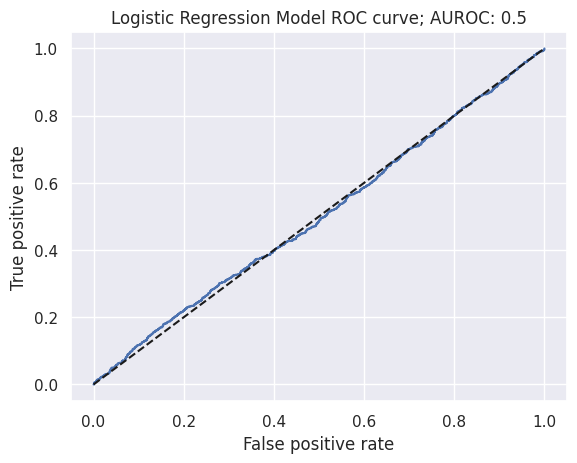

In [221]:
import matplotlib.pyplot as plt
sns.set()

plt.plot(fpr, tpr)

plt.plot(fpr, fpr, linestyle = '--', color = 'k')

plt.xlabel('False positive rate')

plt.ylabel('True positive rate')

AUROC = np.round(roc_auc_score(y_test, y_pred_proba), 2)

plt.title(f'Logistic Regression Model ROC curve; AUROC: {AUROC}');

plt.show()